# Dataset

**Id**:   Unique identifier for each record                                                                              
**customer_id**:   Identifier for the customer                                                                              
**interest_rate**:  Interest rate associated with the customer                                                                              
**name**:   Customer's name                                                                              
**country**:   Country of the customer                                                                              
**date_of_birth**:   Customer's date of birth                                                                              
**address**:   Customer's address                                                                              
**date**:   Date of the transaction or record                                                                              
**atm_transfer_in**:   Amount transferred into the account via ATM                                                                              
**atm_transfer_out**:   Amount transferred out of the account via ATM                                                                              
**bank_transfer_in**:   Amount transferred into the account via bank transfer                                                                              
**bank_transfer_out**:   Amount transferred out of the account via bank transfer                                                                              
**crypto_in**:    Amount of cryptocurrency received                                                                              
**crypto_out**:    Amount of cryptocurrency sent                                                                              
**bank_transfer_in_volume**:    Volume of bank transfers received                                                                              
**bank_transfer_out_volume**:    Volume of bank transfers sent                                                                              
**crypto_in_volume**:    Volume of cryptocurrency received                                                                              
**crypto_out_volume**:    Volume of cryptocurrency sent                                                                              
**complaints**:    Number of complaints filed by the customer                                                                              
**touchpoints**:    Customer engagement touchpoints                                                                              
**csat_scores**:    Customer satisfaction scores                                                                              
**tenure**:    Length of time the customer has been with the bank                                                                              
**from_competitor**:    Indicator if the customer switched from a competitor                                                                              
**job**:    Customer's job title                                                                              
**churn_due_to_fraud**:    Indicator if churn was due to fraud                                                                              
**model_predicted_fraud**:    Prediction if the customer is likely to commit fraud                                                                              
**interest_rate_per_year**:    Annualized interest rate for the customer                                                                              

# Importing required libraries

In [2]:
import glob
import dask.dataframe as dd
from dask import delayed
import duckdb
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# Setting display options for better visualization
pd.set_option('display.max_columns', None)


In [3]:
# Specify the directory containing the dataset
data_dir = (r"C:\Users\navee\Bits_End_Sem_Project\Froject files")  # Replace with the path to your dataset folder

# Step 1: Using Glob to collect train and test Parquet files
train_files = glob.glob(os.path.join(data_dir, "train_*.parquet"))  # Train files (2008 to 2023)
test_file = os.path.join(data_dir, "test.parquet")  # Test file

print(f"Found {len(train_files)} train files and test file located at {test_file}.")

# Step 2: Load train data using Dask for scalability
train_dask_df = dd.read_parquet(train_files)

# Display the first few rows of the train data
print("Train Data Preview:")
print(train_dask_df.head())

# Step 3: Load test data using Dask
test_dask_df = dd.read_parquet(test_file)

# Display the first few rows of the test data
print("Test Data Preview:")
print(test_dask_df.head())

# Step 4: Load the sample submission file
sample_submission_path = os.path.join(data_dir, "sample_submission.csv")
sample_submission_df = pd.read_csv(sample_submission_path)

# Display the sample submission format
print("Sample Submission Format:")
print(sample_submission_df.head())

# Optional: Using DuckDB for querying train data
# Taking a small sample of train data for exploration
train_sample_df = train_dask_df.sample(frac=0.01).compute()
duckdb_conn = duckdb.connect(database=':memory:')

# Register the sample train DataFrame as a DuckDB table
duckdb_conn.register('train_data', train_sample_df)

# Query the data using DuckDB
query = "SELECT * FROM train_data LIMIT 10"
result = duckdb_conn.execute(query).df()

print("Sample Data Queried via DuckDB:")
print(result)

Found 16 train files and test file located at C:\Users\navee\Bits_End_Sem_Project\Froject files\test.parquet.
Train Data Preview:
   Id  customer_id  interest_rate            name    country date_of_birth  \
0   1            1            3.5  Yolanda Parker  Lithuania    1954-07-10   
1   6            1            3.5  Yolanda Parker  Lithuania    1954-07-10   
2  16            1            3.5  Yolanda Parker  Lithuania    1954-07-10   
3  31            1            3.5  Yolanda Parker  Lithuania    1954-07-10   
4  50            1            3.5  Yolanda Parker  Lithuania    1954-07-10   

                                             address       date  \
0  1929 Erin Lights Suite 709
Lake Michaelburgh, ... 2008-01-17   
1  1929 Erin Lights Suite 709
Lake Michaelburgh, ... 2008-01-18   
2  1929 Erin Lights Suite 709
Lake Michaelburgh, ... 2008-01-19   
3  1929 Erin Lights Suite 709
Lake Michaelburgh, ... 2008-01-20   
4  1929 Erin Lights Suite 709
Lake Michaelburgh, ... 2008-01-21   

1. Train Data Handling:
Glob is used to collect all train files (e.g., train_2008.parquet, train_2009.parquet, etc.).
Dask loads these files into a single scalable DataFrame.

2. Test Data Handling:
Dask loads the single test Parquet file.

3. Sample Submission:
Loaded using Pandas for preview and to understand its structure.

5. DuckDB Integration:
Used for querying a small sample of the train dataset.

In [4]:
train_dask_df.head()

,Id,customer_id,interest_rate,name,country,date_of_birth,address,date,atm_transfer_in,atm_transfer_out,bank_transfer_in,bank_transfer_out,crypto_in,crypto_out,bank_transfer_in_volume,bank_transfer_out_volume,crypto_in_volume,crypto_out_volume,complaints,touchpoints,csat_scores,tenure,from_competitor,job,churn_due_to_fraud,model_predicted_fraud
0,1,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-17,0,0,17476,3911,56,13,7380.083338,5844.193394,393.145010,220.900654,0,[],"{'appointment': None, 'email': None, 'phone': ...",0,False,Amenity horticulturist,False,False
1,6,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-18,0,0,19680,3358,46,14,7504.751064,4986.370246,390.005729,221.147296,0,[],"{'appointment': None, 'email': None, 'phone': ...",1,False,Amenity horticulturist,False,False
2,16,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-19,0,0,17958,4113,48,13,6720.934090,7451.373471,393.209108,260.510535,0,[],"{'appointment': None, 'email': None, 'phone': ...",2,False,Amenity horticulturist,False,False
3,31,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-20,0,0,22772,3750,49,15,6976.218992,6548.352211,394.078294,203.214128,0,[],"{'appointment': None, 'email': None, 'phone': ...",3,False,Amenity horticulturist,False,False
4,50,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-21,0,0,23610,4005,60,12,6453.651629,6129.342716,395.174604,207.894467,0,"[whatsapp, email, email]","{'appointment': None, 'email': None, 'phone': ...",4,False,Amenity horticulturist,False,False


# Exploratory Data Analysis (EDA)

In [5]:
# Step 1: Understanding Data Types and Null Values
print("Data Types:\n", train_dask_df.dtypes)

# Check for missing values in the train DataFrame
missing_values = train_dask_df.isnull().sum().compute()  # Compute the sum of null values
print("\nMissing values in each column:")
print(missing_values[missing_values > 0])

Data Types:
 Id                                         int64
customer_id                                int64
interest_rate                            float64
name                             string[pyarrow]
country                          string[pyarrow]
date_of_birth               date32[day][pyarrow]
address                          string[pyarrow]
date                              datetime64[ns]
atm_transfer_in                            int64
atm_transfer_out                           int64
bank_transfer_in                           int64
bank_transfer_out                          int64
crypto_in                                  int64
crypto_out                                 int64
bank_transfer_in_volume                  float64
bank_transfer_out_volume                 float64
crypto_in_volume                         float64
crypto_out_volume                        float64
complaints                                 int64
touchpoints                               object
csat_sc

In [6]:
# Step 2: Descriptive Statistics
print("\nDescriptive Statistics:\n", train_dask_df.describe(include='all'))


Descriptive Statistics:
 Dask DataFrame Structure:
                    Id customer_id interest_rate    name country date_of_birth address    date atm_transfer_in atm_transfer_out bank_transfer_in bank_transfer_out crypto_in crypto_out bank_transfer_in_volume bank_transfer_out_volume crypto_in_volume crypto_out_volume complaints touchpoints csat_scores   tenure from_competitor     job churn_due_to_fraud model_predicted_fraud
npartitions=1                                                                                                                                                                                                                                                                                                                                                                           
               float64     float64       float64  object  object        object  object  object         float64          float64          float64           float64   float64    float64           

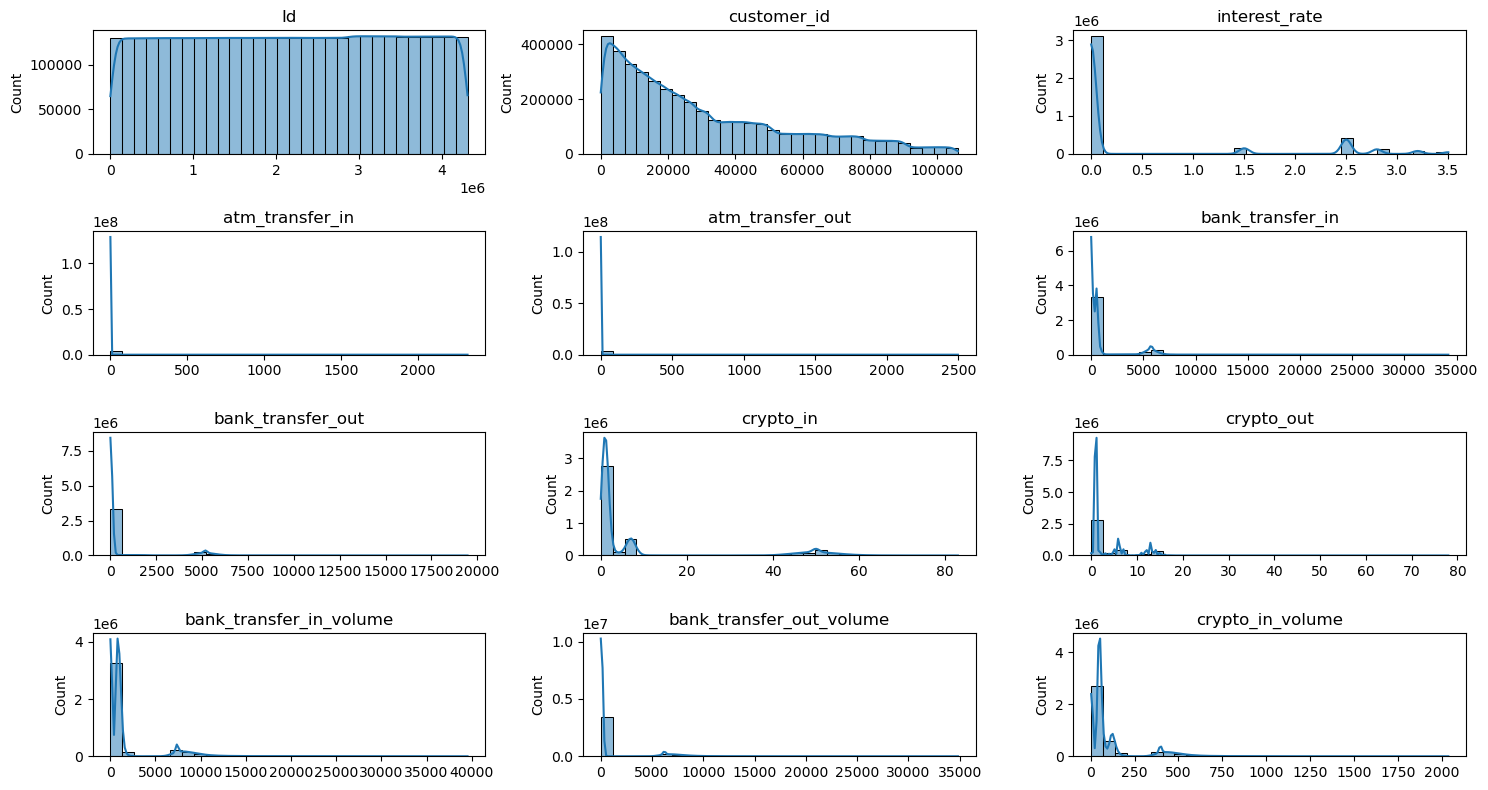

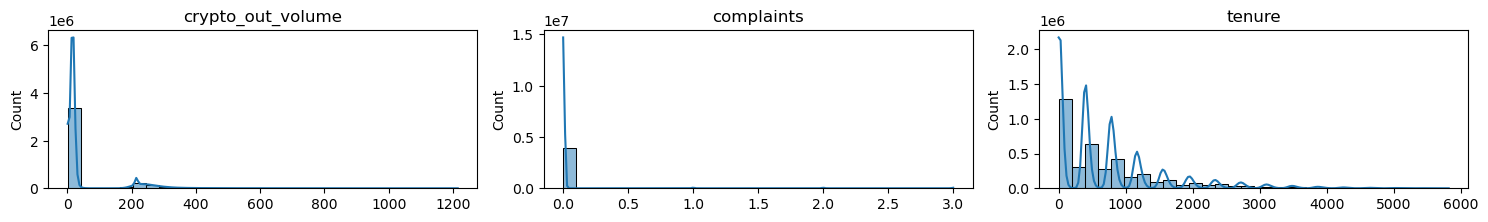

In [7]:
# Step 3: Distribution of Numerical Features
numerical_features = train_dask_df.select_dtypes(include=['float64', 'int64']).columns

# Number of features
num_features = len(numerical_features)
num_cols = 3  # Number of columns for the subplot
num_rows = 4  # Number of rows for the subplot
max_subplots = num_rows * num_cols  # Maximum subplots in one figure

# Create subplots for each batch of features
for start in range(0, num_features, max_subplots):
    plt.figure(figsize=(15, 2 * num_rows))
    for i, feature in enumerate(numerical_features[start:start + max_subplots], 1):
        plt.subplot(num_rows, num_cols, i)
        sns.histplot(train_dask_df[feature], kde=True, bins=30)
        plt.title(feature)

    plt.tight_layout()
    plt.show()

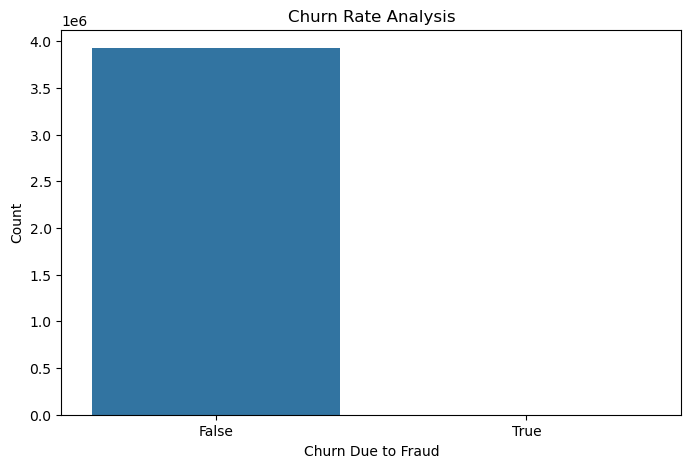

In [8]:
# Step 4: Churn Rate Analysis
# Compute the Dask DataFrame to convert it to a Pandas DataFrame
train_df = train_dask_df.compute()

plt.figure(figsize=(8, 5))
sns.countplot(x='churn_due_to_fraud', data=train_df)
plt.title('Churn Rate Analysis')
plt.xlabel('Churn Due to Fraud')
plt.ylabel('Count')
plt.show()

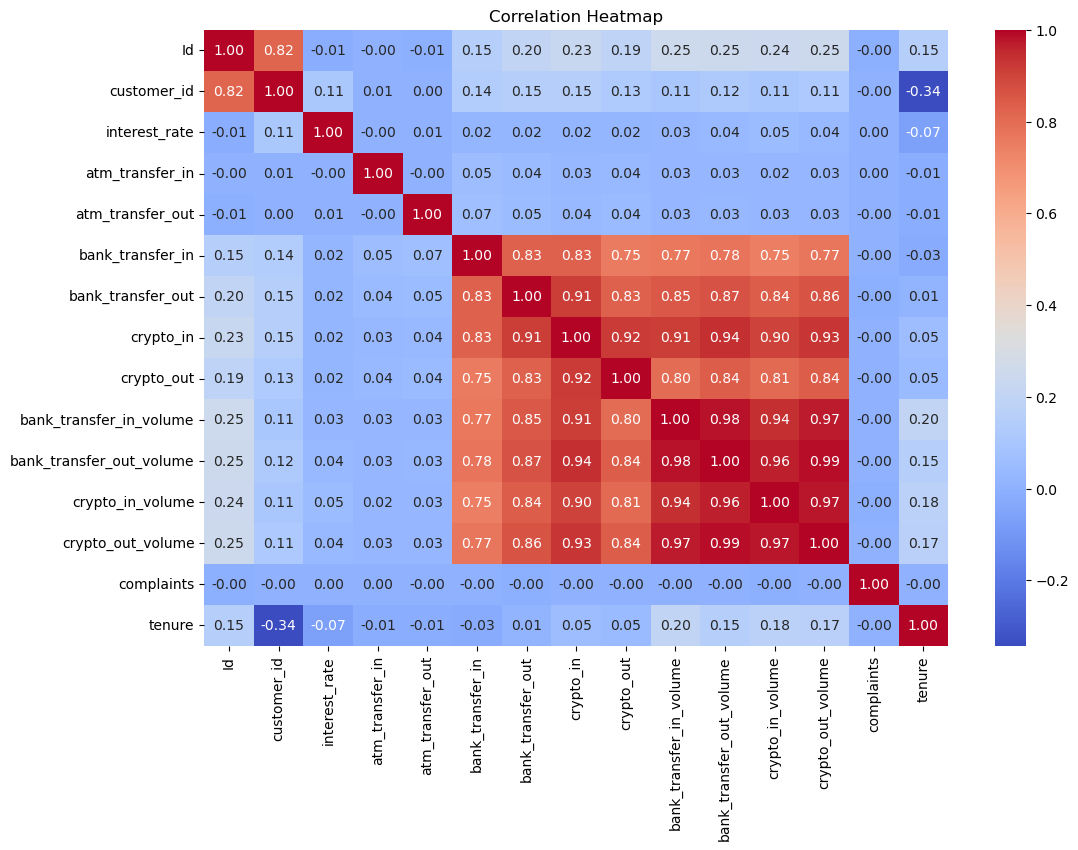

In [9]:
# Step 5: Correlation Analysis

# Select only numeric columns for correlation analysis
numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

# Create the correlation matrix
correlation_matrix = train_df[numeric_cols].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

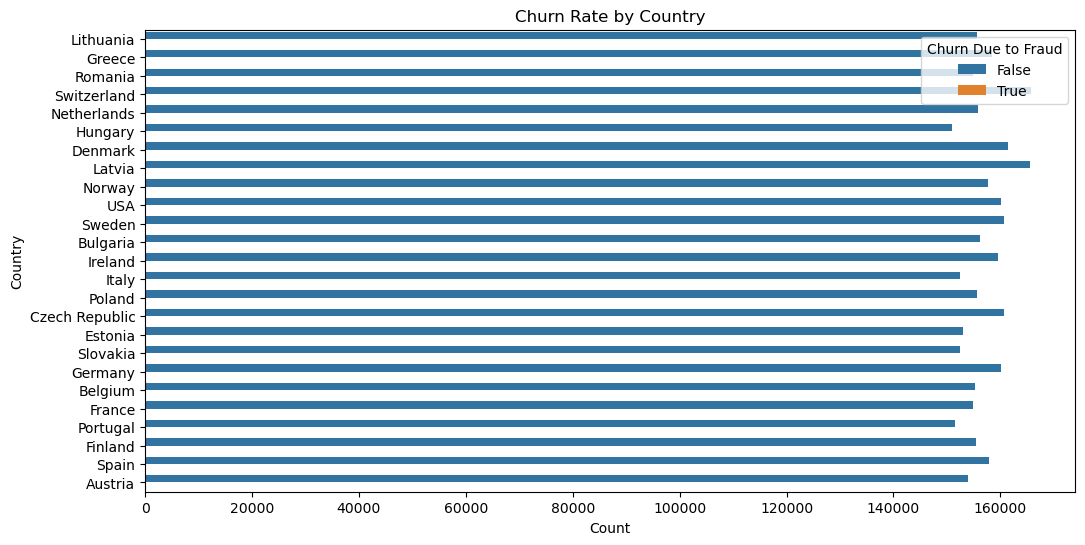

In [10]:
# Step 6: Visualization of Key Features
# Churn rate by country
plt.figure(figsize=(12, 6))
sns.countplot(y='country', hue='churn_due_to_fraud', data=train_df)
plt.title('Churn Rate by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.legend(title='Churn Due to Fraud')
plt.show()

In [11]:
train_dask_df.columns

Index(['Id', 'customer_id', 'interest_rate', 'name', 'country',
       'date_of_birth', 'address', 'date', 'atm_transfer_in',
       'atm_transfer_out', 'bank_transfer_in', 'bank_transfer_out',
       'crypto_in', 'crypto_out', 'bank_transfer_in_volume',
       'bank_transfer_out_volume', 'crypto_in_volume', 'crypto_out_volume',
       'complaints', 'touchpoints', 'csat_scores', 'tenure', 'from_competitor',
       'job', 'churn_due_to_fraud', 'model_predicted_fraud'],
      dtype='object')

# Feature engineering

##### Customer Activity Features

In [12]:
# Total Transactions (ATM, Bank, Crypto)
train_dask_df['total_transactions'] = (
    train_dask_df['atm_transfer_in'] +
    train_dask_df['atm_transfer_out'] +
    train_dask_df['bank_transfer_in'] +
    train_dask_df['bank_transfer_out'] +
    train_dask_df['crypto_in'] +
    train_dask_df['crypto_out']
)

# Transaction Volume Ratios
train_dask_df['crypto_in_ratio'] = train_dask_df['crypto_in_volume'] / train_dask_df['total_transactions']
train_dask_df['bank_in_ratio'] = train_dask_df['bank_transfer_in_volume'] / train_dask_df['total_transactions']

# Net Transaction Volume
train_dask_df['net_bank_volume'] = train_dask_df['bank_transfer_in_volume'] - train_dask_df['bank_transfer_out_volume']
train_dask_df['net_crypto_volume'] = train_dask_df['crypto_in_volume'] - train_dask_df['crypto_out_volume']

In [13]:
train_dask_df.head()

,Id,customer_id,interest_rate,name,country,date_of_birth,address,date,atm_transfer_in,atm_transfer_out,bank_transfer_in,bank_transfer_out,crypto_in,crypto_out,bank_transfer_in_volume,bank_transfer_out_volume,crypto_in_volume,crypto_out_volume,complaints,touchpoints,csat_scores,tenure,from_competitor,job,churn_due_to_fraud,model_predicted_fraud,total_transactions,crypto_in_ratio,bank_in_ratio,net_bank_volume,net_crypto_volume
0,1,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-17,0,0,17476,3911,56,13,7380.083338,5844.193394,393.145010,220.900654,0,[],"{'appointment': None, 'email': None, 'phone': ...",0,False,Amenity horticulturist,False,False,21456,0.018323,0.343964,1535.889944,172.244355
1,6,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-18,0,0,19680,3358,46,14,7504.751064,4986.370246,390.005729,221.147296,0,[],"{'appointment': None, 'email': None, 'phone': ...",1,False,Amenity horticulturist,False,False,23098,0.016885,0.324909,2518.380817,168.858433
2,16,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-19,0,0,17958,4113,48,13,6720.934090,7451.373471,393.209108,260.510535,0,[],"{'appointment': None, 'email': None, 'phone': ...",2,False,Amenity horticulturist,False,False,22132,0.017767,0.303675,-730.439382,132.698573
3,31,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-20,0,0,22772,3750,49,15,6976.218992,6548.352211,394.078294,203.214128,0,[],"{'appointment': None, 'email': None, 'phone': ...",3,False,Amenity horticulturist,False,False,26586,0.014823,0.262402,427.866781,190.864166
4,50,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-21,0,0,23610,4005,60,12,6453.651629,6129.342716,395.174604,207.894467,0,"[whatsapp, email, email]","{'appointment': None, 'email': None, 'phone': ...",4,False,Amenity horticulturist,False,False,27687,0.014273,0.233093,324.308913,187.280137


In [14]:
len(train_dask_df.columns)

31

##### Financial Health Features

In [15]:
# Interest Rate Normalized by Tenure
train_dask_df['interest_rate_per_year'] = train_dask_df['interest_rate'] / (train_dask_df['tenure'] + 1)

# Savings to Expense Ratio
train_dask_df['savings_expense_ratio'] = train_dask_df['net_bank_volume'] / train_dask_df['total_transactions']

In [16]:
len(train_dask_df.columns)

33

In [17]:
train_dask_df.head()

,Id,customer_id,interest_rate,name,country,date_of_birth,address,date,atm_transfer_in,atm_transfer_out,bank_transfer_in,bank_transfer_out,crypto_in,crypto_out,bank_transfer_in_volume,bank_transfer_out_volume,crypto_in_volume,crypto_out_volume,complaints,touchpoints,csat_scores,tenure,from_competitor,job,churn_due_to_fraud,model_predicted_fraud,total_transactions,crypto_in_ratio,bank_in_ratio,net_bank_volume,net_crypto_volume,interest_rate_per_year,savings_expense_ratio
0,1,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-17,0,0,17476,3911,56,13,7380.083338,5844.193394,393.145010,220.900654,0,[],"{'appointment': None, 'email': None, 'phone': ...",0,False,Amenity horticulturist,False,False,21456,0.018323,0.343964,1535.889944,172.244355,3.500000,0.071583
1,6,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-18,0,0,19680,3358,46,14,7504.751064,4986.370246,390.005729,221.147296,0,[],"{'appointment': None, 'email': None, 'phone': ...",1,False,Amenity horticulturist,False,False,23098,0.016885,0.324909,2518.380817,168.858433,1.750000,0.109030
2,16,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-19,0,0,17958,4113,48,13,6720.934090,7451.373471,393.209108,260.510535,0,[],"{'appointment': None, 'email': None, 'phone': ...",2,False,Amenity horticulturist,False,False,22132,0.017767,0.303675,-730.439382,132.698573,1.166667,-0.033004
3,31,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-20,0,0,22772,3750,49,15,6976.218992,6548.352211,394.078294,203.214128,0,[],"{'appointment': None, 'email': None, 'phone': ...",3,False,Amenity horticulturist,False,False,26586,0.014823,0.262402,427.866781,190.864166,0.875000,0.016094
4,50,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-21,0,0,23610,4005,60,12,6453.651629,6129.342716,395.174604,207.894467,0,"[whatsapp, email, email]","{'appointment': None, 'email': None, 'phone': ...",4,False,Amenity horticulturist,False,False,27687,0.014273,0.233093,324.308913,187.280137,0.700000,0.011713


##### Risk-Related Features

In [18]:
# Fraud Suspicion Ratio
train_dask_df['fraud_suspicion_ratio'] = train_dask_df['model_predicted_fraud'].astype(int) / (train_dask_df['tenure'] + 1)

# Churn Fraud Indicator
train_dask_df['churn_fraud_risk'] = (
    train_dask_df['churn_due_to_fraud'].astype(int) + train_dask_df['model_predicted_fraud'].astype(int)
)

In [19]:
len(train_dask_df.columns)

35

In [20]:
train_dask_df.columns

Index(['Id', 'customer_id', 'interest_rate', 'name', 'country',
       'date_of_birth', 'address', 'date', 'atm_transfer_in',
       'atm_transfer_out', 'bank_transfer_in', 'bank_transfer_out',
       'crypto_in', 'crypto_out', 'bank_transfer_in_volume',
       'bank_transfer_out_volume', 'crypto_in_volume', 'crypto_out_volume',
       'complaints', 'touchpoints', 'csat_scores', 'tenure', 'from_competitor',
       'job', 'churn_due_to_fraud', 'model_predicted_fraud',
       'total_transactions', 'crypto_in_ratio', 'bank_in_ratio',
       'net_bank_volume', 'net_crypto_volume', 'interest_rate_per_year',
       'savings_expense_ratio', 'fraud_suspicion_ratio', 'churn_fraud_risk'],
      dtype='object')

In [21]:
# Display structure and summary of the dataset
train_dask_df.info()

<class 'dask_expr.DataFrame'>
Columns: 35 entries, Id to churn_fraud_risk
dtypes: date32[day][pyarrow](1), datetime64[ns](1), object(2), bool(3), float64(12), int32(1), int64(11), string(4)

In [22]:
# Convert to Pandas DataFrame (if memory allows) and display structure
train_pandas_df = train_dask_df.compute()
train_pandas_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 3926058 entries, 0 to 407604
Data columns (total 35 columns):
 #   Column                    Non-Null Count    Dtype               
---  ------                    --------------    -----               
 0   Id                        3926058 non-null  int64               
 1   customer_id               3926058 non-null  int64               
 2   interest_rate             3926058 non-null  float64             
 3   name                      3926058 non-null  string              
 4   country                   3926058 non-null  string              
 5   date_of_birth             3926058 non-null  date32[day][pyarrow]
 6   address                   3926058 non-null  string              
 7   date                      3926058 non-null  datetime64[ns]      
 8   atm_transfer_in           3926058 non-null  int64               
 9   atm_transfer_out          3926058 non-null  int64               
 10  bank_transfer_in          3926058 non-null  int6

In [23]:
# Assuming train_dask_df is your training Dask DataFrame
# Convert 'date_of_birth' and 'date' columns to datetime
train_dask_df['date_of_birth'] = dd.to_datetime(train_dask_df['date_of_birth'], errors='coerce')
train_dask_df['date'] = dd.to_datetime(train_dask_df['date'], errors='coerce')

# Extract year, month, and day from 'date_of_birth'
train_dask_df['year_birth'] = train_dask_df['date_of_birth'].dt.year
train_dask_df['month_birth'] = train_dask_df['date_of_birth'].dt.month
train_dask_df['day_birth'] = train_dask_df['date_of_birth'].dt.day

# Extract year, month, and day from 'date'
train_dask_df['year'] = train_dask_df['date'].dt.year
train_dask_df['month'] = train_dask_df['date'].dt.month
train_dask_df['day'] = train_dask_df['date'].dt.day

# Persist the changes
train_dask_df = train_dask_df.persist()

# Display the updated DataFrame structure
train_dask_df.head()  # Check the first few rows to ensure the new features are added correctly

,Id,customer_id,interest_rate,name,country,date_of_birth,address,date,atm_transfer_in,atm_transfer_out,bank_transfer_in,bank_transfer_out,crypto_in,crypto_out,bank_transfer_in_volume,bank_transfer_out_volume,crypto_in_volume,crypto_out_volume,complaints,touchpoints,csat_scores,tenure,from_competitor,job,churn_due_to_fraud,model_predicted_fraud,total_transactions,crypto_in_ratio,bank_in_ratio,net_bank_volume,net_crypto_volume,interest_rate_per_year,savings_expense_ratio,fraud_suspicion_ratio,churn_fraud_risk,year_birth,month_birth,day_birth,year,month,day
0,1,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-17,0,0,17476,3911,56,13,7380.083338,5844.193394,393.145010,220.900654,0,[],"{'appointment': None, 'email': None, 'phone': ...",0,False,Amenity horticulturist,False,False,21456,0.018323,0.343964,1535.889944,172.244355,3.500000,0.071583,0.0,0,1954,7,10,2008,1,17
1,6,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-18,0,0,19680,3358,46,14,7504.751064,4986.370246,390.005729,221.147296,0,[],"{'appointment': None, 'email': None, 'phone': ...",1,False,Amenity horticulturist,False,False,23098,0.016885,0.324909,2518.380817,168.858433,1.750000,0.109030,0.0,0,1954,7,10,2008,1,18
2,16,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-19,0,0,17958,4113,48,13,6720.934090,7451.373471,393.209108,260.510535,0,[],"{'appointment': None, 'email': None, 'phone': ...",2,False,Amenity horticulturist,False,False,22132,0.017767,0.303675,-730.439382,132.698573,1.166667,-0.033004,0.0,0,1954,7,10,2008,1,19
3,31,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-20,0,0,22772,3750,49,15,6976.218992,6548.352211,394.078294,203.214128,0,[],"{'appointment': None, 'email': None, 'phone': ...",3,False,Amenity horticulturist,False,False,26586,0.014823,0.262402,427.866781,190.864166,0.875000,0.016094,0.0,0,1954,7,10,2008,1,20
4,50,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-21,0,0,23610,4005,60,12,6453.651629,6129.342716,395.174604,207.894467,0,"[whatsapp, email, email]","{'appointment': None, 'email': None, 'phone': ...",4,False,Amenity horticulturist,False,False,27687,0.014273,0.233093,324.308913,187.280137,0.700000,0.011713,0.0,0,1954,7,10,2008,1,21


In [24]:
len(train_dask_df)

3926058

In [25]:
len(train_dask_df.columns)

41

# Feature Engineering for Training Data

In [26]:
train_dask_df_copy = train_dask_df.copy()
train_dask_df_copy.head()

,Id,customer_id,interest_rate,name,country,date_of_birth,address,date,atm_transfer_in,atm_transfer_out,bank_transfer_in,bank_transfer_out,crypto_in,crypto_out,bank_transfer_in_volume,bank_transfer_out_volume,crypto_in_volume,crypto_out_volume,complaints,touchpoints,csat_scores,tenure,from_competitor,job,churn_due_to_fraud,model_predicted_fraud,total_transactions,crypto_in_ratio,bank_in_ratio,net_bank_volume,net_crypto_volume,interest_rate_per_year,savings_expense_ratio,fraud_suspicion_ratio,churn_fraud_risk,year_birth,month_birth,day_birth,year,month,day
0,1,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-17,0,0,17476,3911,56,13,7380.083338,5844.193394,393.145010,220.900654,0,[],"{'appointment': None, 'email': None, 'phone': ...",0,False,Amenity horticulturist,False,False,21456,0.018323,0.343964,1535.889944,172.244355,3.500000,0.071583,0.0,0,1954,7,10,2008,1,17
1,6,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-18,0,0,19680,3358,46,14,7504.751064,4986.370246,390.005729,221.147296,0,[],"{'appointment': None, 'email': None, 'phone': ...",1,False,Amenity horticulturist,False,False,23098,0.016885,0.324909,2518.380817,168.858433,1.750000,0.109030,0.0,0,1954,7,10,2008,1,18
2,16,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-19,0,0,17958,4113,48,13,6720.934090,7451.373471,393.209108,260.510535,0,[],"{'appointment': None, 'email': None, 'phone': ...",2,False,Amenity horticulturist,False,False,22132,0.017767,0.303675,-730.439382,132.698573,1.166667,-0.033004,0.0,0,1954,7,10,2008,1,19
3,31,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-20,0,0,22772,3750,49,15,6976.218992,6548.352211,394.078294,203.214128,0,[],"{'appointment': None, 'email': None, 'phone': ...",3,False,Amenity horticulturist,False,False,26586,0.014823,0.262402,427.866781,190.864166,0.875000,0.016094,0.0,0,1954,7,10,2008,1,20
4,50,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-21,0,0,23610,4005,60,12,6453.651629,6129.342716,395.174604,207.894467,0,"[whatsapp, email, email]","{'appointment': None, 'email': None, 'phone': ...",4,False,Amenity horticulturist,False,False,27687,0.014273,0.233093,324.308913,187.280137,0.700000,0.011713,0.0,0,1954,7,10,2008,1,21


###### Label encoding of column country 

In [27]:
# Ensure the 'country' column is categorized with known categories
train_dask_df_copy['country'] = train_dask_df_copy['country'].astype('category').cat.as_known()

# Create a mapping for the label encoding
label_mapping = {category: idx for idx, category in enumerate(train_dask_df_copy['country'].cat.categories)}

# Define the metadata for the new column
meta = ('country_encoded', 'int')

# Apply the mapping to create the label encoded column with metadata
train_dask_df_copy['country_encoded'] = train_dask_df_copy['country'].map(label_mapping, meta=meta)

# Drop the original 'country' column if you want to remove it
# train_dask_df_copy = train_dask_df_copy.drop('country', axis=1)

# Optionally, persist the DataFrames to optimize performance for future computations
train_dask_df_copy = train_dask_df_copy.persist()

# Display the updated DataFrame structure
print("Train DataFrame after Label Encoding:")
print(train_dask_df_copy[['country', 'country_encoded']].head())

Train DataFrame after Label Encoding:
     country country_encoded
0  Lithuania              23
1  Lithuania              23
2  Lithuania              23
3  Lithuania              23
4  Lithuania              23


In [28]:
train_pandas_df = train_dask_df_copy.compute()
train_pandas_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 3926058 entries, 0 to 407604
Data columns (total 42 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   Id                        3926058 non-null  int64         
 1   customer_id               3926058 non-null  int64         
 2   interest_rate             3926058 non-null  float64       
 3   name                      3926058 non-null  string        
 4   country                   3926058 non-null  category      
 5   date_of_birth             3926058 non-null  datetime64[ns]
 6   address                   3926058 non-null  string        
 7   date                      3926058 non-null  datetime64[ns]
 8   atm_transfer_in           3926058 non-null  int64         
 9   atm_transfer_out          3926058 non-null  int64         
 10  bank_transfer_in          3926058 non-null  int64         
 11  bank_transfer_out         3926058 non-null  int64       

###### Encoding the JOB column

In [29]:
# Categorize the 'job' column to ensure known categories
train_dask_df_copy = train_dask_df_copy.categorize(columns=['job'])

# Create a new column with encoded job values
train_dask_df_copy['job_encoded'] = train_dask_df_copy['job'].cat.codes

# Persist the changes to memory
train_dask_df_copy = train_dask_df_copy.persist()

# Verify the encoding
print(train_dask_df_copy[['job', 'job_encoded']].head())

                      job  job_encoded
0  Amenity horticulturist           33
1  Amenity horticulturist           33
2  Amenity horticulturist           33
3  Amenity horticulturist           33
4  Amenity horticulturist           33


In [30]:
train_dask_df_copy.head()

,Id,customer_id,interest_rate,name,country,date_of_birth,address,date,atm_transfer_in,atm_transfer_out,bank_transfer_in,bank_transfer_out,crypto_in,crypto_out,bank_transfer_in_volume,bank_transfer_out_volume,crypto_in_volume,crypto_out_volume,complaints,touchpoints,csat_scores,tenure,from_competitor,job,churn_due_to_fraud,model_predicted_fraud,total_transactions,crypto_in_ratio,bank_in_ratio,net_bank_volume,net_crypto_volume,interest_rate_per_year,savings_expense_ratio,fraud_suspicion_ratio,churn_fraud_risk,year_birth,month_birth,day_birth,year,month,day,country_encoded,job_encoded
0,1,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-17,0,0,17476,3911,56,13,7380.083338,5844.193394,393.145010,220.900654,0,[],"{'appointment': None, 'email': None, 'phone': ...",0,False,Amenity horticulturist,False,False,21456,0.018323,0.343964,1535.889944,172.244355,3.500000,0.071583,0.0,0,1954,7,10,2008,1,17,23,33
1,6,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-18,0,0,19680,3358,46,14,7504.751064,4986.370246,390.005729,221.147296,0,[],"{'appointment': None, 'email': None, 'phone': ...",1,False,Amenity horticulturist,False,False,23098,0.016885,0.324909,2518.380817,168.858433,1.750000,0.109030,0.0,0,1954,7,10,2008,1,18,23,33
2,16,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-19,0,0,17958,4113,48,13,6720.934090,7451.373471,393.209108,260.510535,0,[],"{'appointment': None, 'email': None, 'phone': ...",2,False,Amenity horticulturist,False,False,22132,0.017767,0.303675,-730.439382,132.698573,1.166667,-0.033004,0.0,0,1954,7,10,2008,1,19,23,33
3,31,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-20,0,0,22772,3750,49,15,6976.218992,6548.352211,394.078294,203.214128,0,[],"{'appointment': None, 'email': None, 'phone': ...",3,False,Amenity horticulturist,False,False,26586,0.014823,0.262402,427.866781,190.864166,0.875000,0.016094,0.0,0,1954,7,10,2008,1,20,23,33
4,50,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-21,0,0,23610,4005,60,12,6453.651629,6129.342716,395.174604,207.894467,0,"[whatsapp, email, email]","{'appointment': None, 'email': None, 'phone': ...",4,False,Amenity horticulturist,False,False,27687,0.014273,0.233093,324.308913,187.280137,0.700000,0.011713,0.0,0,1954,7,10,2008,1,21,23,33


In [31]:
train_pandas_df = train_dask_df_copy.compute()
train_pandas_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 3926058 entries, 0 to 407604
Data columns (total 43 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   Id                        3926058 non-null  int64         
 1   customer_id               3926058 non-null  int64         
 2   interest_rate             3926058 non-null  float64       
 3   name                      3926058 non-null  string        
 4   country                   3926058 non-null  category      
 5   date_of_birth             3926058 non-null  datetime64[ns]
 6   address                   3926058 non-null  string        
 7   date                      3926058 non-null  datetime64[ns]
 8   atm_transfer_in           3926058 non-null  int64         
 9   atm_transfer_out          3926058 non-null  int64         
 10  bank_transfer_in          3926058 non-null  int64         
 11  bank_transfer_out         3926058 non-null  int64       

In [32]:
train_pandas_df.head(10)

,Id,customer_id,interest_rate,name,country,date_of_birth,address,date,atm_transfer_in,atm_transfer_out,bank_transfer_in,bank_transfer_out,crypto_in,crypto_out,bank_transfer_in_volume,bank_transfer_out_volume,crypto_in_volume,crypto_out_volume,complaints,touchpoints,csat_scores,tenure,from_competitor,job,churn_due_to_fraud,model_predicted_fraud,total_transactions,crypto_in_ratio,bank_in_ratio,net_bank_volume,net_crypto_volume,interest_rate_per_year,savings_expense_ratio,fraud_suspicion_ratio,churn_fraud_risk,year_birth,month_birth,day_birth,year,month,day,country_encoded,job_encoded
0,1,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-17,0,0,17476,3911,56,13,7380.083338,5844.193394,393.145010,220.900654,0,[],"{'appointment': None, 'email': None, 'phone': ...",0,False,Amenity horticulturist,False,False,21456,0.018323,0.343964,1535.889944,172.244355,3.500000,0.071583,0.0,0,1954,7,10,2008,1,17,23,33
1,6,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-18,0,0,19680,3358,46,14,7504.751064,4986.370246,390.005729,221.147296,0,[],"{'appointment': None, 'email': None, 'phone': ...",1,False,Amenity horticulturist,False,False,23098,0.016885,0.324909,2518.380817,168.858433,1.750000,0.109030,0.0,0,1954,7,10,2008,1,18,23,33
2,16,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-19,0,0,17958,4113,48,13,6720.934090,7451.373471,393.209108,260.510535,0,[],"{'appointment': None, 'email': None, 'phone': ...",2,False,Amenity horticulturist,False,False,22132,0.017767,0.303675,-730.439382,132.698573,1.166667,-0.033004,0.0,0,1954,7,10,2008,1,19,23,33
3,31,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-20,0,0,22772,3750,49,15,6976.218992,6548.352211,394.078294,203.214128,0,[],"{'appointment': None, 'email': None, 'phone': ...",3,False,Amenity horticulturist,False,False,26586,0.014823,0.262402,427.866781,190.864166,0.875000,0.016094,0.0,0,1954,7,10,2008,1,20,23,33
4,50,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-21,0,0,23610,4005,60,12,6453.651629,6129.342716,395.174604,207.894467,0,"[whatsapp, email, email]","{'appointment': None, 'email': None, 'phone': ...",4,False,Amenity horticulturist,False,False,27687,0.014273,0.233093,324.308913,187.280137,0.700000,0.011713,0.0,0,1954,7,10,2008,1,21,23,33
5,102,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-23,0,0,17996,3732,48,14,7386.624187,6672.073046,341.282736,171.205073,0,[],"{'appointment': None, 'email': None, 'phone': ...",6,False,Amenity horticulturist,False,False,21790,0.015662,0.338991,714.551140,170.077663,0.500000,0.032793,0.0,0,1954,7,10,2008,1,23,23,33
6,134,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-24,0,0,19137,3035,56,13,8046.409884,6787.981678,378.111975,204.183903,0,[],"{'appointment': None, 'email': None, 'phone': ...",7,False,Amenity horticulturist,False,False,22241,0.017001,0.361783,1258.428206,173.928072,0.437500,0.056581,0.0,0,1954,7,10,2008,1,24,23,33
7,171,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-25,0,0,21262,3686,49,12,7045.520771,6172.885909,407.930587,197.097479,0,[],"{'appointment': None, 'email': None, 'phone': ...",8,False,Amenity horticulturist,False,False,25009,0.016311,0.281719,872.634861,210.833108,0.388889,0.034893,0.0,0,1954,7,10,2008,1,25,23,33
8,211,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709 Lake Michaelburgh, ...",2008-01-26,0,0,16851,3812,52,13,7189.473923,5936.818661,377.328868,218.909579,0,[],"{'appointment': None, 'email': None, 'phone': ...",9,False,Amenity horticulturist,False,False,20728,0.018204,0.346848,1252.655262,158.419289,0.350000,0.060433,0.0,0,1954,7,10,2008,1,26,23,33
9,254,1,3.5,Yolanda Pa

# Feature Selection

In [33]:
# Numerical Features
features_num = ['interest_rate', 'atm_transfer_in', 'atm_transfer_out', 'bank_transfer_in', 'bank_transfer_out','crypto_in', 'crypto_out','bank_transfer_in_volume', 'bank_transfer_out_volume','crypto_in_volume', 'crypto_out_volume','complaints', 'tenure', 'total_transactions',
'crypto_in_ratio', 'bank_in_ratio','net_bank_volume', 'net_crypto_volume','interest_rate_per_year', 'savings_expense_ratio','fraud_suspicion_ratio']

# Time-Related Features (constant per customer)
features_time = ['year_birth', 'month_birth', 'day_birth']

# Categorical Features
features_cat = ['name', 'country', 'from_competitor', 'job','country_encoded', 'job_encoded']

# Other Features
features_other = ['customer_id', 'address', 'touchpoints', 'csat_scores','model_predicted_fraud']

# Target Variable
target = 'churn_due_to_fraud'

#### Correlation matrix

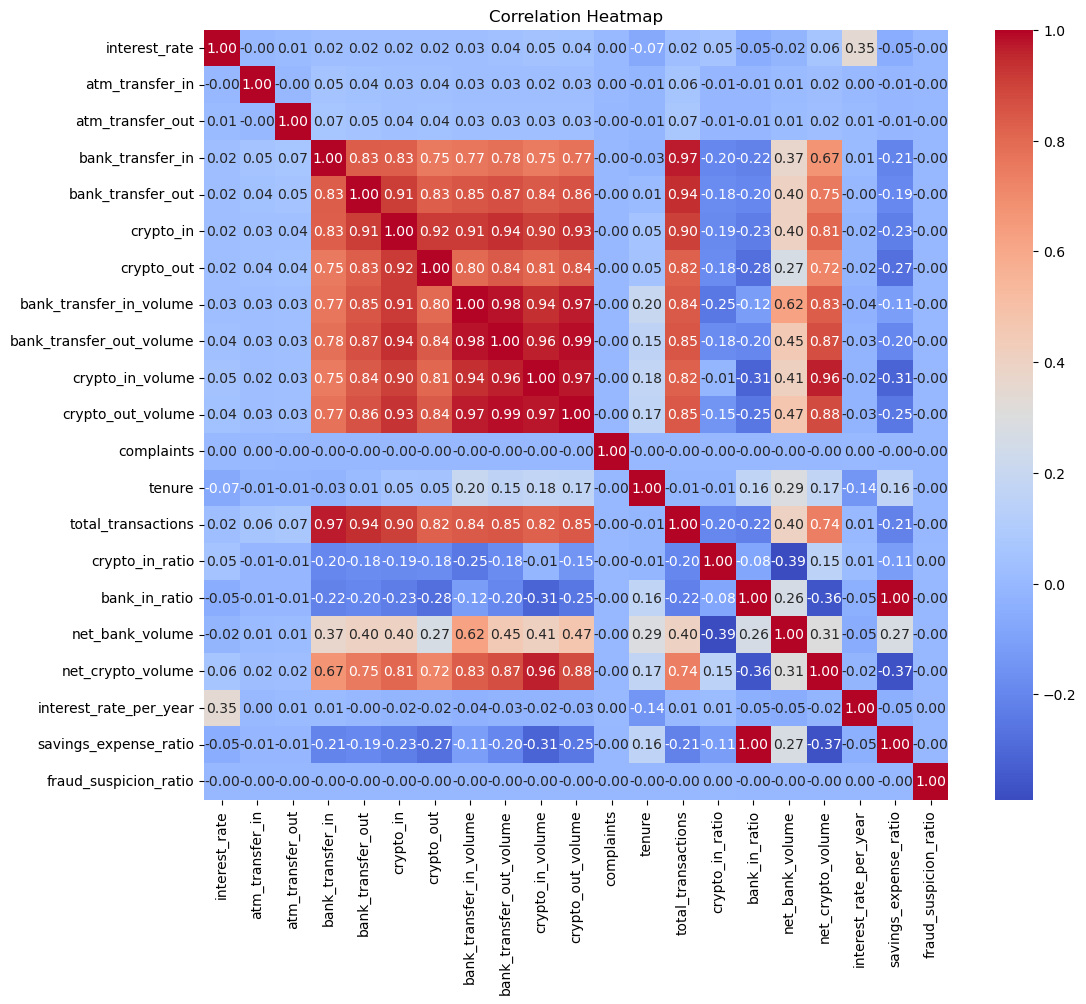

Highly correlated feature pairs (correlation > 0.85):
bank_transfer_in and total_transactions with correlation 0.97
bank_transfer_out and crypto_in with correlation 0.91
bank_transfer_out and bank_transfer_in_volume with correlation 0.85
bank_transfer_out and bank_transfer_out_volume with correlation 0.87
bank_transfer_out and crypto_out_volume with correlation 0.86
bank_transfer_out and total_transactions with correlation 0.94
crypto_in and crypto_out with correlation 0.92
crypto_in and bank_transfer_in_volume with correlation 0.91
crypto_in and bank_transfer_out_volume with correlation 0.94
crypto_in and crypto_in_volume with correlation 0.90
crypto_in and crypto_out_volume with correlation 0.93
crypto_in and total_transactions with correlation 0.90
bank_transfer_in_volume and bank_transfer_out_volume with correlation 0.98
bank_transfer_in_volume and crypto_in_volume with correlation 0.94
bank_transfer_in_volume and crypto_out_volume with correlation 0.97
bank_transfer_out_volume and

In [34]:
# Convert Dask DataFrame to Pandas DataFrame for correlation analysis
train_pandas_df = train_dask_df_copy[features_num].compute()

# Calculate the correlation matrix
correlation_matrix = train_pandas_df.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

# Identify features with high correlation (threshold: 0.85)
correlation_threshold = 0.85
high_corr_features = []

# Iterate through the correlation matrix and find correlated pairs
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            high_corr_features.append(
                (correlation_matrix.columns[i], correlation_matrix.columns[j])
            )

# Display highly correlated feature pairs
if high_corr_features:
    print("Highly correlated feature pairs (correlation > 0.85):")
    for pair in high_corr_features:
        print(f"{pair[0]} and {pair[1]} with correlation {correlation_matrix.loc[pair[0], pair[1]]:.2f}")
else:
    print("No features with correlation higher than the threshold.")

**Considering the ccorrelation matrix we are dropping the columns below as they are highly correlated** . 
bank_transfer_in                                                                                                                                   
bank_transfer_out                                                                                                                                   
bank_transfer_in_volume                                                                                                                                   
crypto_in                                                                                                                                   
crypto_out                                                                                                                                                                                                                                                                      
bank_transfer_out_volume                                                                                                                                   
crypto_in_volume                                                                                                                                                                                                                                                                  
savings_expense_ratio                                                                                                                                   

In [ ]:
import duckdb

# Convert Dask DataFrame to pandas DataFrame for DuckDB processing
train_df_pandas = train_dask_df_copy.compute()

# Create an in-memory DuckDB connection
conn = duckdb.connect()

# Load the pandas DataFrame into DuckDB
conn.register("train_df", train_df_pandas)

# Query to count occurrences of each category in 'churn_due_to_fraud'
query = """
SELECT 
    churn_due_to_fraud AS category,
    COUNT(*) AS count
FROM 
    train_df
GROUP BY 
    churn_due_to_fraud
ORDER BY 
    category;
"""

# Execute the query and fetch the results
result = conn.execute(query).fetchdf()

# Display the results
print(result)

   category    count
0     False  3926031
1      True       27


In [ ]:
import duckdb

# Convert Dask DataFrame to pandas DataFrame for DuckDB processing
train_df_pandas = train_dask_df_copy.compute()

# Create an in-memory DuckDB connection
conn = duckdb.connect()

# Load the pandas DataFrame into DuckDB
conn.register("train_df", train_df_pandas)

# Query to undersample the majority class randomly
query = """
WITH majority AS (
    SELECT * FROM train_df WHERE churn_due_to_fraud = False
    ORDER BY random()  -- Randomly shuffle the majority class rows
    LIMIT (SELECT COUNT(*) FROM train_df WHERE churn_due_to_fraud = True) * 1300  -- Take up to 10 times the number of minority samples
),
minority AS (
    SELECT * FROM train_df WHERE churn_due_to_fraud = True
)
SELECT * FROM majority
UNION ALL
SELECT * FROM minority;
"""

# Execute the query and fetch the undersampled results
undersampled_result = conn.execute(query).fetchdf()

# Display the undersampled results
print(undersampled_result) 

In [181]:
len(undersampled_result)

35127

In [182]:
undersampled_result.head()

,Id,customer_id,interest_rate,name,country,date_of_birth,address,date,atm_transfer_in,atm_transfer_out,bank_transfer_in,bank_transfer_out,crypto_in,crypto_out,bank_transfer_in_volume,bank_transfer_out_volume,crypto_in_volume,crypto_out_volume,complaints,touchpoints,csat_scores,tenure,from_competitor,job,churn_due_to_fraud,model_predicted_fraud,total_transactions,crypto_in_ratio,bank_in_ratio,net_bank_volume,net_crypto_volume,interest_rate_per_year,savings_expense_ratio,fraud_suspicion_ratio,churn_fraud_risk,year_birth,month_birth,day_birth,year,month,day,country_encoded,job_encoded
0,2127988,8897,0.0,Cynthia Holloway,Spain,1958-06-18,"927 Christina Glens\nRussellborough, UT 55983 ...",2018-08-02,0,0,2,5,1,1,1501.998797,28.041376,6.929936,2.477390,0,[],"{'appointment': None, 'email': None, 'phone': ...",2300,False,"Conservator, museum/gallery",False,False,9,0.769993,166.888755,1473.957421,4.452545,0.000000,163.773047,0.0,0,1958,6,18,2018,8,2,12,134
1,1514148,6284,0.0,Peter Stark,Germany,1991-09-20,"8643 Brandy Parks Suite 722\nKellyville, IA 31...",2016-08-01,0,0,469,2,1,1,1224.918583,150.218651,73.371702,26.316798,0,[],"{'appointment': None, 'email': None, 'phone': ...",1958,False,Community pharmacist,False,False,473,0.155120,2.589680,1074.699932,47.054903,0.000000,2.272093,0.0,0,1991,9,20,2016,8,1,22,126
2,4226155,103150,2.5,Christopher Perez,Lithuania,1957-07-25,"4149 Smith Center Apt. 649\nAmymouth, MN 70540...",2023-10-21,0,0,0,2,8,5,28.542202,11.438132,43.077566,14.670566,0,[],"{'appointment': None, 'email': None, 'phone': ...",3,False,Risk analyst,False,False,15,2.871838,1.902813,17.104071,28.407000,0.625000,1.140271,0.0,0,1957,7,25,2023,10,21,23,517
3,2825295,27665,0.0,Catherine Contreras,Estonia,1992-03-18,"47960 Heather Dam\nMelendezburgh, WA 49837 Est...",2019-12-10,0,0,3,2,8,6,24.692983,14.041390,50.921950,13.519586,0,[],"{'appointment': None, 'email': None, 'phone': ...",794,False,"Nurse, learning disability",False,False,19,2.680103,1.299631,10.651593,37.402364,0.000000,0.560610,0.0,0,1992,3,18,2019,12,10,13,402
4,80804,2408,3.2,Raven Howell,Netherlands,1968-02-02,"234 Tyler Point Apt. 499\nGregoryburgh, VT 544...",2009-05-25,0,0,0,2,1,5,25.334703,13.559819,45.824172,10.504907,0,[],"{'appointment': None, 'email': None, 'phone': ...",13,False,Regulatory affairs officer,False,False,8,5.728022,3.166838,11.774885,35.319265,0.228571,1.471861,0.0,0,1968,2,2,2009,5,25,24,503


### Handling Outliers 

In [192]:
True_count = undersampled_result['churn_due_to_fraud'].value_counts().get(True, 1)
print(f'Count of True values in the target column: {True_count}')

False_count = undersampled_result['churn_due_to_fraud'].value_counts().get(False, 0)
print(f'Count of False values in the target column: {False_count}')

Count of True values in the target column: 27
Count of False values in the target column: 35100


In [169]:
## below code is to handle outliers but it is removing all the minority classes . . Hence as of now we are ignoring this . 

In [170]:
len(undersampled_result)

35127

# Model Selection

In [171]:
final_selected_cols = ['interest_rate', 'atm_transfer_in', 'atm_transfer_out', 'bank_transfer_in', 'bank_transfer_out','crypto_in', 'crypto_out','bank_transfer_in_volume', 'bank_transfer_out_volume','crypto_in_volume', 'crypto_out_volume','complaints', 'tenure', 'total_transactions',
'crypto_in_ratio', 'bank_in_ratio','net_bank_volume', 'net_crypto_volume','interest_rate_per_year', 'savings_expense_ratio','fraud_suspicion_ratio', 'country_encoded', 'job_encoded']


In [172]:
x_train = undersampled_result[final_selected_cols].fillna(0)
y_train = undersampled_result[target].astype(int)

In [173]:

scale_pos_weight = len(undersampled_result[undersampled_result['churn_due_to_fraud'] == False]) / len(undersampled_result[undersampled_result['churn_due_to_fraud'] == True])

print("scale_pos_weight:", scale_pos_weight)

scale_pos_weight: 1300.0


In [174]:
x_train.head()

,interest_rate,atm_transfer_in,atm_transfer_out,bank_transfer_in,bank_transfer_out,crypto_in,crypto_out,bank_transfer_in_volume,bank_transfer_out_volume,crypto_in_volume,crypto_out_volume,complaints,tenure,total_transactions,crypto_in_ratio,bank_in_ratio,net_bank_volume,net_crypto_volume,interest_rate_per_year,savings_expense_ratio,fraud_suspicion_ratio,country_encoded,job_encoded
0,0.0,0,0,2,5,1,1,1501.998797,28.041376,6.929936,2.477390,0,2300,9,0.769993,166.888755,1473.957421,4.452545,0.000000,163.773047,0.0,12,134
1,0.0,0,0,469,2,1,1,1224.918583,150.218651,73.371702,26.316798,0,1958,473,0.155120,2.589680,1074.699932,47.054903,0.000000,2.272093,0.0,22,126
2,2.5,0,0,0,2,8,5,28.542202,11.438132,43.077566,14.670566,0,3,15,2.871838,1.902813,17.104071,28.407000,0.625000,1.140271,0.0,23,517
3,0.0,0,0,3,2,8,6,24.692983,14.041390,50.921950,13.519586,0,794,19,2.680103,1.299631,10.651593,37.402364,0.000000,0.560610,0.0,13,402
4,3.2,0,0,0,2,1,5,25.334703,13.559819,45.824172,10.504907,0,13,8,5.728022,3.166838,11.774885,35.319265,0.228571,1.471861,0.0,24,503


####  Over sampling using SMOTE 

In [175]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(sampling_strategy=0.1, random_state=42)  # 10% of the majority class

# Apply SMOTE
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Output to confirm successful application
print("SMOTE applied successfully!")
print("Class distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

SMOTE applied successfully!
Class distribution after SMOTE:
churn_due_to_fraud
0    35100
1     3510
Name: count, dtype: int64


In [193]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the XGBoost model without use_label_encoder
model = xgb.XGBClassifier(eval_metric='logloss')

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'scale_pos_weight': [350],  # Set your scale_pos_weight
}

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(x_train_resampled, y_train_resampled)

# Best parameters from grid search
best_model = grid_search.best_estimator_

# Evaluate the model on the training set
y_pred = best_model.predict(x_train_resampled)

# (Optional) To evaluate the performance, you can print the accuracy score or a classification report
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_train_resampled, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_train_resampled, y_pred))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35100
           1       1.00      1.00      1.00      3510

    accuracy                           1.00     38610
   macro avg       1.00      1.00      1.00     38610
weighted avg       1.00      1.00      1.00     38610

